<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [9]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [12]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
306,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,58610.0,57105.0,43957.0,473954.0,205630.0,747980.0,NaN,NaN,211.0,255.0
308,1998_ARIZONA,ARIZONA,1998,794331.0,4675296.0,470398.0,2000801.0,2204097.0,4726098.0,2091741.0,...,67764.0,63943.0,45813.0,543670.0,224867.0,848262.0,NaN,NaN,206.0,260.0
309,1998_ARKANSAS,ARKANSAS,1998,456355.0,2567380.0,226475.0,1505419.0,835486.0,2536027.0,1367612.0,...,35034.0,35936.0,29123.0,282517.0,132507.0,452256.0,NaN,NaN,209.0,256.0
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,462241.0,424768.0,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0
311,1998_COLORADO,COLORADO,1998,686360.0,4359021.0,215071.0,1879850.0,2264100.0,4739136.0,2253623.0,...,54382.0,53556.0,40076.0,436825.0,197136.0,699135.0,NaN,NaN,220.0,264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Reading for 8 grade>**   (Ex. Math foR 8th grade)

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [13]:
print(sorted(df["YEAR"].unique()))
year_unique = df.groupby("YEAR")
len(year_unique)
# there are 33 different year of data in total; only 13 contained out desire value

[1992, 1994, 1998, 2002, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019]


13

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [14]:
state_unique = df.groupby("STATE")
all_state_score = state_unique["AVG_READING_8_SCORE"].mean()
Michigan_score = all_state_score["MICHIGAN"]
Ohio_score = all_state_score["OHIO"]

print("Michigan_score is ", all_state_score["MICHIGAN"])
print("Ohio_score is ", all_state_score["OHIO"])
Michigan_score > Ohio_score
Ohio_score - Michigan_score
# Ohio state has higher score 

Michigan_score is  263.5
Ohio_score is  267.7


4.199999999999989

Find the average for your pedictor score across all states in 2019

In [15]:
year_unique = df.groupby("YEAR")
all_state_score_by_year = year_unique["AVG_READING_8_SCORE"].mean()

print("Average score in 2019 over all states is = ", 
      all_state_score_by_year[2019])
# Average score in 2019 over all states is =  262.5660377358491

Average score in 2019 over all states is =  262.5660377358491


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [16]:
state_unique = df.groupby("STATE")
state_unique["AVG_READING_8_SCORE"].max()

STATE
ALABAMA                 259.0
ALASKA                  261.0
ARIZONA                 263.0
ARKANSAS                262.0
CALIFORNIA              263.0
COLORADO                271.0
CONNECTICUT             275.0
DELAWARE                267.0
DISTRICT_OF_COLUMBIA    250.0
DODEA                   280.0
FLORIDA                 267.0
GEORGIA                 266.0
HAWAII                  261.0
IDAHO                   270.0
ILLINOIS                267.0
INDIANA                 272.0
IOWA                    269.0
KANSAS                  269.0
KENTUCKY                270.0
LOUISIANA               257.0
MAINE                   271.0
MARYLAND                274.0
MASSACHUSETTS           278.0
MICHIGAN                266.0
MINNESOTA               271.0
MISSISSIPPI             256.0
MISSOURI                268.0
MONTANA                 273.0
NATIONAL                268.0
NEBRASKA                270.0
NEVADA                  262.0
NEW_HAMPSHIRE           275.0
NEW_JERSEY              276.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [17]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

Final feature list: **<LIST FEATURES HERE\>**

Feature selection justification: SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0.5, 1.0, 'Distribution of 8th grade reading scores')

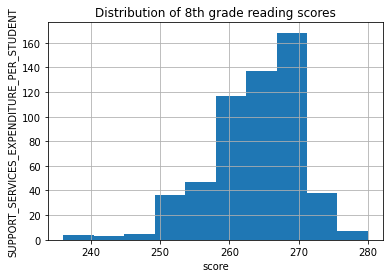

In [18]:
df.AVG_READING_8_SCORE.hist()
plt.xlabel('SCORE')
plt.ylabel('SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT')
plt.title('Distribution of 8th grade reading scores')

According to the graph, we see that the score is related to the SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT. More score means more SUPPORT SERVICES EXPENDITURE PER STUDENT till score 270.

**Visualization 2**

Text(0.5, 1.0, '8th grade reading score over time')

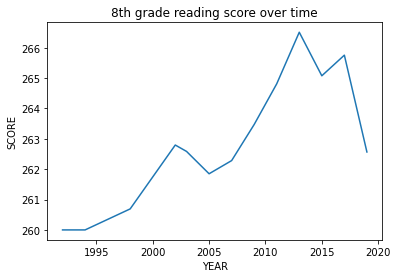

In [19]:
df.groupby('YEAR').AVG_READING_8_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('8th grade reading score over time')

From the graph we notice that the mean reading score for grade 8 has an increase trend, except that there are decrease in 2005, roughly 2014, and 2018

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df[['TOTAL_REVENUE','ENROLL_8','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [25]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [28]:
# create your model here
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [33]:
# FOR CLASSIFICATION ONLY:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(model, X_test, y_test,
#                         cmap=plt.cm.Blues)

Text(0, 0.5, 'READING_8_SCORE')

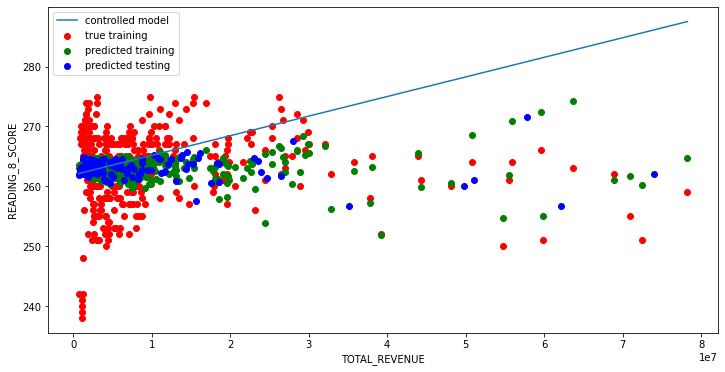

In [34]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "TOTAL_REVENUE"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("READING_8_SCORE")

<h2> Summary </h2>

there is a roughly linearly relationship between total reading score in 8th grade and total revenue；However, the data still mostly gather between 0 and 1e^7.